# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

Year  Month                      Supplier ItemCode  \
0  2017      4               ROYAL WINE CORP   100200   
1  2017      4      SANTA MARGHERITA USA INC   100749   
2  2017      4            JIM BEAM BRANDS CO    10103   
3  2017      4  HEAVEN HILL DISTILLERIES INC    10120   
4  2017      4               ROYAL WINE CORP   101664   

                             Description ItemType  RetailSales  \
0                      GAMLA CAB - 750ML     WINE          0.0   
1   SANTA MARGHERITA P/GRIG ALTO - 375ML     WINE          0.0   
2  KNOB CREEK BOURBON 9YR - 100P - 375ML   LIQUOR          0.0   
3          J W DANT BOURBON 100P - 1.75L   LIQUOR          0.0   
4            RAMON CORDOVA RIOJA - 750ML     WINE          0.0   

   RetailTransfers  WarehouseSales  
0              1.0             0.0  
1              1.0             0.0  
2              8.0             0.0  
3              2.0             0.0  
4              4.0             0.0

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

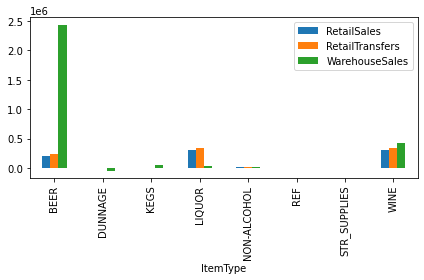

In [62]:
Totals = data[["RetailSales", "RetailTransfers", "WarehouseSales","ItemType"]].groupby(["ItemType"]).agg("sum")
Totals.plot.bar()
plt.tight_layout()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [67]:
data['TotalSales'] = data['RetailSales'] + data['WarehouseSales'] + data['RetailTransfers']
top10 = data.groupby(['Supplier']).agg("sum")
top10 = top10.sort_values(by=['TotalSales'], ascending=False)
top10 = top10.head(10).reset_index()
top10 = top10[['TotalSales','Supplier']]

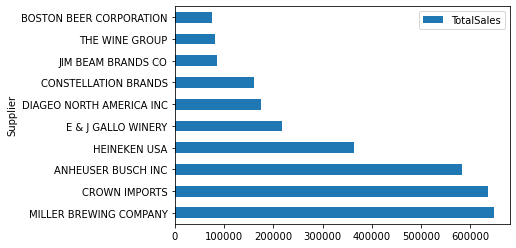

In [70]:
top10 = top10.set_index('Supplier')
top10.plot.barh()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [98]:
dataavg = data.groupby(['Month']).agg("mean")
dataavg = dataavg.reset_index()
dataavg = dataavg.rename(columns={'RetailSales':'AvgRetailSales','RetailTransfers':'AvgRetailTransfers',
                                  'WarehouseSales':'AvgWarehouseSales'})

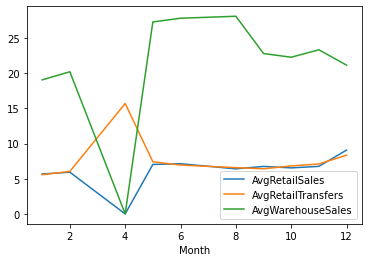

In [90]:
dataavg.plot(x='Month', y=['AvgRetailSales','AvgRetailTransfers','AvgWarehouseSales'])

## 4. Plot the same information as above but as a bar chart.

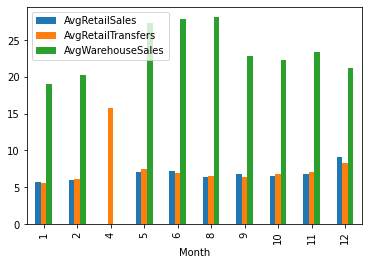

In [100]:
dataavg = dataavg[['AvgRetailSales','AvgRetailTransfers','AvgWarehouseSales']]
dataavg.plot.bar()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [4]:
items = data
items = items.astype({'Year': str, 'Month': str})
items['Year&Month'] = items['Year']+" "+items['Month']
items
items = items.groupby(['Year&Month','ItemType']).agg('sum')
items = items.reset_index()
items.head(60)

Year&Month      ItemType  RetailSales  RetailTransfers  WarehouseSales
0     2017 10          BEER     22583.78         22478.76       254991.61
1     2017 10       DUNNAGE         0.00             0.00        -6605.00
2     2017 10          KEGS         0.00             0.00         5522.00
3     2017 10        LIQUOR     32491.59         34712.95         3659.84
4     2017 10   NON-ALCOHOL       945.63           988.59         1049.92
5     2017 10           REF        22.82            12.00        -1329.00
6     2017 10  STR_SUPPLIES        84.38           388.00            0.00
7     2017 10          WINE     33108.76         34455.67        46424.54
8     2017 11          BEER     23341.14         25858.78       279490.12
9     2017 11       DUNNAGE         0.00             0.00        -5610.00
10    2017 11          KEGS         0.00             0.00         5663.00
11    2017 11        LIQUOR     35524.77         36684.62         3846.56
12    2017 11   NON-ALCOHOL      1005.19           952.24         1105.17
13    2017 11           REF        63.11             8.92        -2130.00
14    2017 11  STR_SUPPLIES       106.06           391.00            0.00
15    2017 11          WINE     38275.92         39335.40        56940.81
16    2017 12          BEER     28822.16         24978.53       250504.30
17    2017 12       DUNNAGE         0.00             0.00        -4892.00
18    2017 12          KEGS         0.00             0.00         4834.00
19    2017 12        LIQUOR     49522.28         45260.17         3419.51
20    2017 12   NON-ALCOHOL      1316.44          1128.42          945.75
21    2017 12           REF        41.21            29.00        -1800.00
22    2017 12  STR_SUPPLIES       439.64           918.00            0.00
23    2017 12          WINE     51492.76         48815.39        53945.66
24     2017 4          BEER         0.00         20045.00            0.00
25     2017 4        LIQUOR         0.00         29568.82            0.00
26     2017 4   NON-ALCOHOL         0.00          1031.00            0.00
27     2017 4           REF         0.00            13.00            0.00
28     2017 4  STR_SUPPLIES         0.00           293.00            0.00
29     2017 4          WINE         0.00         30649.66            0.00
30     2017 5          BEER     25023.24         27133.83       313046.66
31     2017 5        LIQUOR     35123.36         36129.11         4086.09
32     2017 5          WINE     34546.89         36582.76        50276.05
33     2017 6          BEER     27863.26         28864.42       326192.94
34     2017 6       DUNNAGE         0.00             0.00        -6384.00
35     2017 6          KEGS         0.00             0.00         6236.00
36     2017 6        LIQUOR     35035.31         33299.86         4366.68
37     2017 6   NON-ALCOHOL      1209.23          1266.17         1343.75
38     2017 6           REF        30.60            49.00          -66.00
39     2017 6  STR_SUPPLIES        89.22           302.74            0.00
40     2017 6          WINE     33129.64         30937.81        47701.46
41     2017 8          BEER     23030.13         25747.67       329371.89
42     2017 8       DUNNAGE         0.00             0.00        -5940.00
43     2017 8          KEGS         0.00             0.00         6163.00
44     2017 8        LIQUOR     32186.04         31911.70         3840.43
45     2017 8   NON-ALCOHOL      1091.28          1110.16         1221.75
46     2017 8           REF        19.54            18.00         -704.00
47     2017 8  STR_SUPPLIES        77.34           357.00            0.00
48     2017 8          WINE     30707.45         30341.90        48233.62
49     2017 9          BEER     23852.76         21490.18       258320.23
50     2017 9       DUNNAGE         0.00             0.00        -5535.00
51     2017 9          KEGS         0.00             0.00         5354.00
52     2017 9        LIQUOR     32532.32         31605.49         3310.43
53     

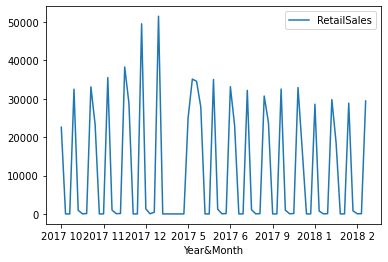

In [9]:
items.plot(x='Year&Month', y=['RetailSales','ItemType'])

In [14]:
items2 = items.groupby(['ItemType','Year&Month']).agg('sum')
# items2.plot(x='Year&Month', y=['RetailSales','ItemType'])
items2

RetailSales  RetailTransfers  WarehouseSales
ItemType Year&Month                                              
BEER     2017 10        22583.78         22478.76       254991.61
         2017 11        23341.14         25858.78       279490.12
         2017 12        28822.16         24978.53       250504.30
         2017 4             0.00         20045.00            0.00
         2017 5         25023.24         27133.83       313046.66
...                          ...              ...             ...
WINE     2017 6         33129.64         30937.81        47701.46
         2017 8         30707.45         30341.90        48233.62
         2017 9         32936.89         31545.10        43509.70
         2018 1         29792.72         27073.47        41646.14
         2018 2         29409.39         30973.35        44331.49

[73 rows x 3 columns]

## 6. Plot the same information as above but as a bar chart.

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

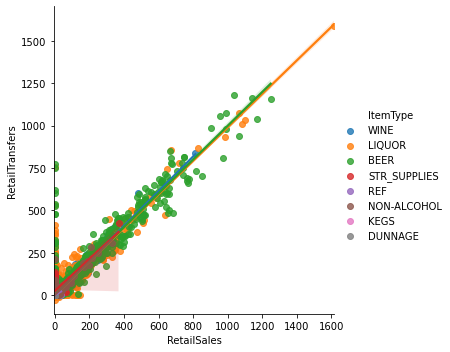

In [134]:
sns.lmplot(x='RetailSales', y='RetailTransfers', data=data, hue='ItemType')

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

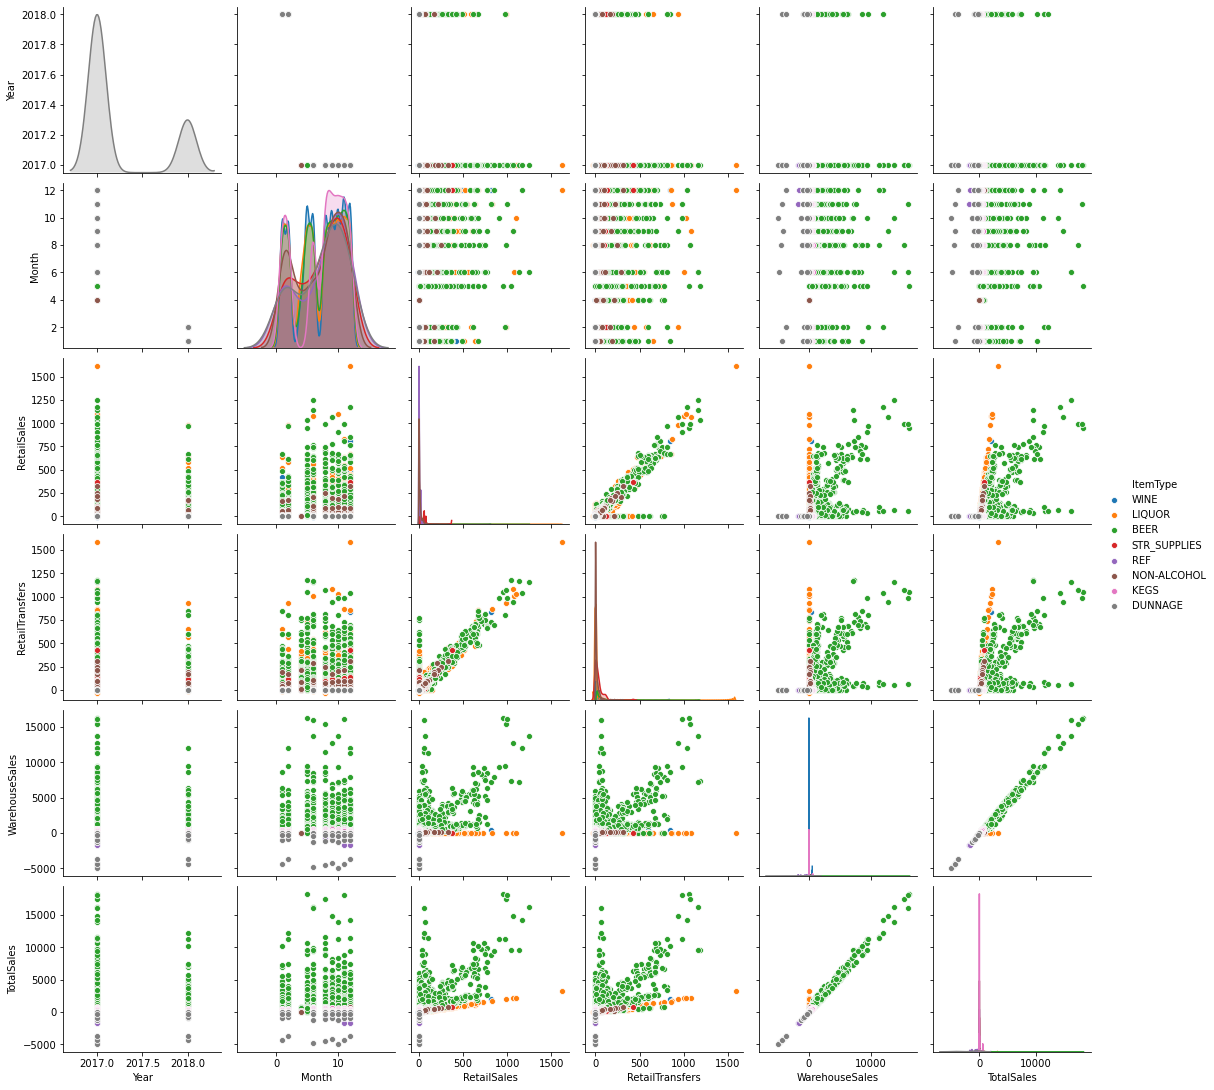

In [135]:
sns.pairplot(data, hue='ItemType')

In [136]:
data.dtypes

Year                 int64
Month                int64
Supplier            object
ItemCode            object
Description         object
ItemType            object
RetailSales        float64
RetailTransfers    float64
WarehouseSales     float64
TotalSales         float64
dtype: object